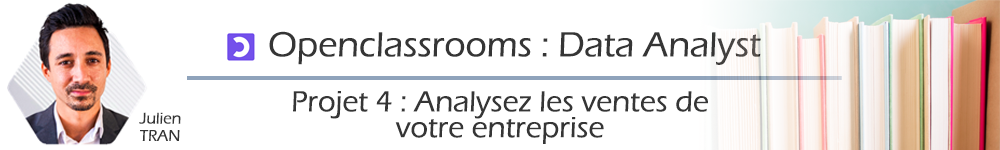

### Mission n° 1 : Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

### Sommaire //Mission 1 📚

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des différentes tables](#3)
    * [3.1.customers](#3.1)
        * [3.1.1.Valeurs manquantes, nulles et NA](#3.1.1)
        * [3.1.2.Doublons](#3.1.2)
        * [3.1.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
    * [3.2.products](#3.2)
        * [3.2.1.Valeurs manquantes, nulles et NA](#3.2.1)
        * [3.2.2.Doublons](#3.2.2)
        * [3.2.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
    * [3.3.transactions](#3.3)
        * [3.3.1.Valeurs manquantes, nulles et NA](#3.3.1)
        * [3.3.2.Doublons](#3.3.2)
        * [3.3.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
        * [3.3.4.Formatage des dates en mois](#3.1.4)
    * [3.4.Jointure des tables products et transactions (left)](#3.4)
    * [3.5.Jointure des tables customers et transactions (left)](#3.5)
    * [3.6.Jointure des tables customers et products_transactions](#3.6)
        * [3.6.1.Valeurs manquantes, nulles et NA](#3.6.1)
        * [3.6.2.Doublons](#3.6.2)
        * [3.6.3.Outliers, valeurs abberantes et atypiques](#3.6.3)
        * [3.6.4.Conversion de la colonne birth en age](#3.6.4)
        * [3.6.5.Création d'une colonne tranches d'ages](#3.6.5)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard

import numpy as np
import pandas as pd
import datetime

#Je definis le nombre de lignes max affichées sur 100

pd.set_option("max_rows", None) 
pd.set_option("display.precision",3)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv

customers = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/customers.csv")
products = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/products.csv")
transactions = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/transactions.csv")

#J'affiche une phrase si l'import est reussi

print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.Nettoyage des différentes tables <a class="anchor" id="3"></a>

## 3.1.customers <a class="anchor" id="3.1"></a>

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers['client_id'].count()

8623

In [5]:
customers.describe()

,birth
count,8623.000
mean,1978.281
std,16.920
min,1929.000
25%,1966.000
50%,1979.000
75%,1992.000
max,2004.000


## 3.1.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1"></a>

In [6]:
print(customers.isnull().values.any())

False


## 3.1.2.Doublons <a class="anchor" id="3.1.2"></a>

In [7]:
print(customers.duplicated().values.any())

False


## 3.1.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.1.3"></a>

In [8]:
# Je supprime les valeurs tests detecté lors de la verification des doublons de la tables transactions
customers = customers[~customers.client_id.str.contains("ct")]

## 3.2.products <a class="anchor" id="3.2"></a>

In [9]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
products.describe()

,price,categ
count,3287.000,3287.000
mean,21.857,0.370
std,29.848,0.615
min,-1.000,0.000
25%,6.990,0.000
50%,13.060,0.000
75%,22.990,1.000
max,300.000,2.000


## 3.2.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1"></a>

In [11]:
print(products.isnull().values.any())

False


## 3.2.2.Doublons <a class="anchor" id="3.2.2"></a>

In [12]:
print(products.duplicated().values.any())

False


## 3.2.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.2.3"></a>

In [13]:
# Je supprime les valeurs tests detecté lors de la verification des doublons de la tables transactions
products = products[~products.id_prod.str.contains("T")]

## 3.3.transactions <a class="anchor" id="3.3"></a>

In [14]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [15]:
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


## 3.3.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.3.1"></a>

In [16]:
print(transactions.isnull().values.any())

False


## 3.3.2.Doublons <a class="anchor" id="3.3.2"></a>

In [17]:
print(transactions.duplicated().values.any())
print(transactions.duplicated().sum())

#je check à la main cest 126 lignes

transactions.loc[transactions.duplicated(), :]

True
126


,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
62365,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
71097,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
72405,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1
75176,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
76735,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0


### Je supprime les doublons de la table transactions

In [18]:
transactions = transactions.drop_duplicates()

print(transactions.duplicated().values.any())

False


## 3.3.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.3.3"></a>

In [19]:
transactions = transactions[~transactions.date.str.contains("test")]

## 3.3.4.formatage des dates en mois <a class="anchor" id="3.3.4"></a>

In [20]:
transactions.date=pd.to_datetime(transactions.date)
transactions.date=transactions.date.dt.strftime('%Y-%m')

transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04,s_18746,c_4450
1,2_226,2022-02,s_159142,c_277
2,1_374,2021-09,s_94290,c_4270
3,0_2186,2021-10,s_105936,c_4597
4,0_1351,2021-07,s_63642,c_1242


## 3.4.Jointure des tables products et transactions (left) <a class="anchor" id="3.4"></a>

In [21]:
#j'ajoute une colonne pour indiquer quelle ligne provient de quelle table
products_transactions = transactions.merge(products.drop_duplicates(), on='id_prod', how='left', indicator=True)
products_transactions.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04,s_18746,c_4450,4.99,0.0,both
1,2_226,2022-02,s_159142,c_277,65.75,2.0,both
2,1_374,2021-09,s_94290,c_4270,10.71,1.0,both
3,0_2186,2021-10,s_105936,c_4597,4.20,0.0,both
4,0_1351,2021-07,s_63642,c_1242,8.99,0.0,both


### Affichage des lignes trouvées uniquement dans la table transactions

In [22]:
products_transactions_left = products_transactions.loc[(products_transactions['_merge'] == 'left_only')]
products_transactions_left.head()

,id_prod,date,session_id,client_id,price,categ,_merge
6231,0_2245,2021-06,s_49705,c_1533,NaN,NaN,left_only
10797,0_2245,2021-06,s_49323,c_7954,NaN,NaN,left_only
14045,0_2245,2021-11,s_124474,c_5120,NaN,NaN,left_only
17480,0_2245,2022-02,s_172304,c_4964,NaN,NaN,left_only
21071,0_2245,2021-03,s_3,c_580,NaN,NaN,left_only


### Remplacement des valeurs manquantes dans la colonne price en utilisant la moyenne

In [23]:
mean = products_transactions['price'].mean()
products_transactions['price'].fillna(mean, inplace=True)

### Remplacement des valeurs manquantes dans la colonne catégorie par 0

In [24]:
products_transactions['categ'].fillna(0, inplace=True)

products_transactions_left = products_transactions.loc[(products_transactions['_merge'] == 'left_only')]
products_transactions_left.head()

,id_prod,date,session_id,client_id,price,categ,_merge
6231,0_2245,2021-06,s_49705,c_1533,17.215,0.0,left_only
10797,0_2245,2021-06,s_49323,c_7954,17.215,0.0,left_only
14045,0_2245,2021-11,s_124474,c_5120,17.215,0.0,left_only
17480,0_2245,2022-02,s_172304,c_4964,17.215,0.0,left_only
21071,0_2245,2021-03,s_3,c_580,17.215,0.0,left_only


## 3.5.Jointure des tables customers et transactions (left) <a class="anchor" id="3.5"></a>

In [25]:
#j'ajoute une colonne pour indiquer quelle ligne provient de quelle table
customers_transactions = transactions.merge(customers.drop_duplicates(), on='client_id', how='right', indicator=True)
customers_transactions.head()

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1455,2021-03,s_9942,c_4410,f,1967,both
1,0_1376,2021-09,s_94984,c_4410,f,1967,both
2,1_312,2022-01,s_156960,c_4410,f,1967,both
3,1_653,2021-07,s_68860,c_4410,f,1967,both
4,0_1110,2021-11,s_114715,c_4410,f,1967,both


### Affichage des lignes trouvées uniquement dans la table customers

In [26]:
customers_indecis = customers_transactions.loc[(customers_transactions['_merge'] == 'right_only')]
customers_indecis

,id_prod,date,session_id,client_id,sex,birth,_merge
29516,NaN,NaN,NaN,c_8253,f,2001,right_only
99355,NaN,NaN,NaN,c_3789,f,1997,right_only
108189,NaN,NaN,NaN,c_4406,f,1998,right_only
109296,NaN,NaN,NaN,c_2706,f,1967,right_only
111918,NaN,NaN,NaN,c_3443,m,1959,right_only
123281,NaN,NaN,NaN,c_4447,m,1956,right_only
123535,NaN,NaN,NaN,c_3017,f,1992,right_only
129492,NaN,NaN,NaN,c_4086,f,1992,right_only
155401,NaN,NaN,NaN,c_6930,m,2004,right_only
158642,NaN,NaN,NaN,c_4358,m,1999,right_only


## 3.6.Jointure des tables customers et products_transactions <a class="anchor" id="3.6"></a>

In [27]:
customers_transactions_products = pd.merge(customers, products_transactions, on= 'client_id')
customers_transactions_products.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,1967,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,1967,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,1967,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,1967,0_1110,2021-11,s_114715,4.71,0.0,both


## 3.6.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.6.1"></a>

In [28]:
print(customers_transactions_products.isnull().values.any())

False


## 3.6.2.Doublons <a class="anchor" id="3.6.2"></a>

In [29]:
print(customers_transactions_products.duplicated().values.any())
print(customers_transactions_products.duplicated().sum())

#Il s'agit de la colonne merge ou both figure pour toutes les lignes

True
408


## 3.6.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.6.3"></a>

### Aggregation de la derniere table par client_id

In [30]:
customers_transactions_products2 = customers_transactions_products.groupby('client_id').sum()

customers_transactions_products2.head()

,birth,price,categ
client_id,,,
c_1,39100,300.65,6.0
c_10,54768,586.18,19.0
c_100,11952,222.87,5.0
c_1000,110096,980.02,36.0
c_1001,114956,1102.45,16.0


### Ordonnancement de la table pour afficher les plus gros clients

In [31]:
customers_transactions_products_sorted = customers_transactions_products2.sort_values(by = [('price')], ascending = False).dropna(axis=0)

customers_transactions_products_sorted.head()

,birth,price,categ
client_id,,,
c_1609,25452900,162007.34,2570.0
c_4958,5121438,144257.21,4208.0
c_6714,8802864,73231.77,1971.0
c_3454,6448475,54477.35,1953.0
c_7959,384930,2564.25,38.0


Les 4 premiers clients représentent en réalité des client BtoB et non BtoC comme le reste des clients, je décide donc de supprimer ces 4 clients de ma table pour ne pas fausser les résultats de mes analyses

### Suppressions des 4 clients BtoB

In [32]:
customers_transactions_products = customers_transactions_products[customers_transactions_products.client_id != 'c_1609']
customers_transactions_products = customers_transactions_products[customers_transactions_products.client_id != 'c_4958']
customers_transactions_products = customers_transactions_products[customers_transactions_products.client_id != 'c_6714']
customers_transactions_products = customers_transactions_products[customers_transactions_products.client_id != 'c_3454']

## 3.6.4.Conversion la colonne birth en age <a class="anchor" id="3.6.4"></a>

In [33]:
customers_transactions_products['birth'] = 2022 - customers_transactions_products['birth']

customers_transactions_products.rename(columns={'birth': 'age'}, inplace = True)

customers_transactions_products.head()

,client_id,sex,age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,55,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,55,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,55,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,55,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,55,0_1110,2021-11,s_114715,4.71,0.0,both


## 3.6.5.Création d'une colonne tranches d'ages <a class="anchor" id="3.6.5"></a>

In [34]:
bin_labels=labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

customers_transactions_products['tranche_age'] = pd.cut(x=customers_transactions_products['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=bin_labels)

customers_transactions_products = customers_transactions_products[['client_id', 'sex', 'age', 'tranche_age', 'id_prod','date','session_id', 'price','categ', '_merge']]

customers_transactions_products.head()

,client_id,sex,age,tranche_age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,55,51-60,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,55,51-60,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,55,51-60,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,55,51-60,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,55,51-60,0_1110,2021-11,s_114715,4.71,0.0,both
